<a href="https://colab.research.google.com/github/axellebersier/Urban_data_mining/blob/main/Data_description_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Processing**


##Data description

Set up and load the data

In [176]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [177]:
import pandas as pd

url = 'https://github.com/axellebersier/Urban_data_mining/blob/main/Data/data_2020.xlsx?raw=true'
df_2020 = pd.read_excel(url)



##Data Description 2020

In [178]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2145 non-null   int64  
 1   p_infrastructure       2145 non-null   float64
 2   p_forested             2145 non-null   float64
 3   p_agriculture          2145 non-null   float64
 4   p_improductible        2145 non-null   float64
 5   surface_polygone       2145 non-null   float64
 6   natural_growth_1000    2145 non-null   float64
 7   density                2145 non-null   float64
 8   dependency_ratio       2145 non-null   float64
 9   migration_intern       2145 non-null   float64
 10  migration              2145 non-null   float64
 11  p_employment           2145 non-null   float64
 12  primary_sector         2145 non-null   float64
 13  secondary_sector       2145 non-null   float64
 14  tertiary_sector        2145 non-null   float64
 15  p_so

Rename some spelling errors columns

In [179]:
df_2020 = df_2020.rename(columns={'p_improductible': 'p_unproductive'})
df_2020 = df_2020.rename(columns={'p_new_entreprise': 'p_new_enterprise'})

In [180]:
df_2020.describe()

,ID,p_infrastructure,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,...,p_foreigners,p_individual_houses,Population,p_pop_19,p_pop_65,lat,long,zab_2022,net_income_h,p_transport
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,...,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000
mean,3289.818182,0.158968,0.326205,0.449217,0.065521,1856.974168,0.654317,444.820686,67.176986,4.048122,...,17.147792,59.415219,3987.226527,20.376726,19.610593,0.429263,0.579187,109.141118,37811.926677,4.364536
std,2133.934762,0.153436,0.160898,0.191230,0.139096,3378.290930,6.082067,801.936889,9.242258,20.765305,...,9.707020,13.593901,12948.907725,3.328135,4.377195,0.208710,0.230824,182.736145,15409.772494,3.856459
min,1.000000,0.001505,0.000000,0.000000,0.000000,31.000000,-43.243243,0.825294,31.481481,-125.786164,...,0.000000,0.000000,32.000000,2.040816,5.808477,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1067.000000,0.062319,0.207513,0.319037,0.003188,442.000000,-2.171995,82.336957,61.338532,-7.159214,...,9.735531,51.461988,740.000000,18.614389,16.595451,0.266845,0.408319,28.730000,30788.931771,1.981132
50%,3296.000000,0.108153,0.312115,0.469442,0.010854,832.000000,0.886525,189.460784,66.348449,2.574949,...,15.432099,61.538462,1600.000000,20.527091,19.163410,0.417888,0.617521,60.990000,34960.337178,3.245943
75%,5411.000000,0.204301,0.426199,0.597001,0.047372,1681.000000,3.957457,480.884676,72.040816,13.533671,...,23.486842,68.929198,3913.000000,22.377622,21.951220,0.591635,0.781933,131.380000,40433.462867,5.447471
max,6810.000000,0.983051,0.893204,0.916667,0.949424,43861.000000,38.834951,12796.986817,168.750000,154.838710,...,58.810409,96.153846,421878.000000,37.209302,40.666667,1.000000,1.000000,4829.330000,452632.653061,46.100917


In [181]:
w_pop = df_2020.iloc[:, 22].tolist()  # the column of the population

w_surf = df_2020.iloc[:, 27].tolist() # the column of the surface

In [182]:
print(df_2020.columns)
#df_2020.drop('Population', axis=1, inplace=True)
#df_2020.drop('surface_polygone', axis=1, inplace=True)

Index(['ID', 'p_infrastructure', 'p_forested', 'p_agriculture',
       'p_unproductive', 'surface_polygone', 'natural_growth_1000', 'density',
       'dependency_ratio', 'migration_intern', 'migration', 'p_employment',
       'primary_sector', 'secondary_sector', 'tertiary_sector',
       'p_social_assistance', 'p_new_buildings', 'p_new_housings', 'p_cinema',
       'p_museum', 'p_culture_institution', 'size_households',
       'p_new_enterprise', 'p_weddings', 'p_foreigners', 'p_individual_houses',
       'Population', 'p_pop_19', 'p_pop_65', 'lat', 'long', 'zab_2022',
       'net_income_h', 'p_transport'],
      dtype='object')


In [183]:
df_2020.head()

,ID,p_infrastructure,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,...,p_foreigners,p_individual_houses,Population,p_pop_19,p_pop_65,lat,long,zab_2022,net_income_h,p_transport
0,3,0.177658,0.286676,0.526245,0.010767,743.0,4.650331,755.047106,68.620379,-0.536577,...,17.308378,71.557156,5610.0,21.922406,14.136126,0.565600,0.756055,92.40,45237.221823,5.107527
1,27,0.435484,0.447581,0.104839,0.020161,248.0,-0.547121,1490.725806,59.974037,15.592942,...,23.262104,61.704835,3697.0,26.069246,14.460285,0.605342,0.945369,113.23,39810.819037,10.800000
2,29,0.227273,0.561983,0.165289,0.037190,242.0,7.263123,641.322314,62.343096,9.904259,...,17.396907,70.833333,1552.0,25.307125,14.987715,0.602022,0.943557,46.35,51245.633040,6.666667
3,52,0.315615,0.306755,0.369878,0.006645,903.0,3.621358,1320.487265,59.989266,-2.610746,...,25.226434,58.082497,11924.0,31.192661,11.009174,0.601838,0.820014,230.67,40517.938092,8.758315
4,61,0.238289,0.334012,0.405295,0.022403,491.0,3.766478,217.311609,69.904459,10.357815,...,11.059044,77.094972,1067.0,21.890547,16.915423,0.571598,0.896693,45.26,43108.514664,5.295316


In [184]:
df_ID =  df_2020.iloc[:,0]
df_2020 =  df_2020.iloc[:,1:]
df_2020

,p_infrastructure,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,migration,...,p_foreigners,p_individual_houses,Population,p_pop_19,p_pop_65,lat,long,zab_2022,net_income_h,p_transport
0,0.177658,0.286676,0.526245,0.010767,743.0,4.650331,755.047106,68.620379,-0.536577,1.073153,...,17.308378,71.557156,5610.0,21.922406,14.136126,0.565600,0.756055,92.40,45237.221823,5.107527
1,0.435484,0.447581,0.104839,0.020161,248.0,-0.547121,1490.725806,59.974037,15.592942,7.933251,...,23.262104,61.704835,3697.0,26.069246,14.460285,0.605342,0.945369,113.23,39810.819037,10.800000
2,0.227273,0.561983,0.165289,0.037190,242.0,7.263123,641.322314,62.343096,9.904259,24.430505,...,17.396907,70.833333,1552.0,25.307125,14.987715,0.602022,0.943557,46.35,51245.633040,6.666667
3,0.315615,0.306755,0.369878,0.006645,903.0,3.621358,1320.487265,59.989266,-2.610746,7.074280,...,25.226434,58.082497,11924.0,31.192661,11.009174,0.601838,0.820014,230.67,40517.938092,8.758315
4,0.238289,0.334012,0.405295,0.022403,491.0,3.766478,217.311609,69.904459,10.357815,-3.766478,...,11.059044,77.094972,1067.0,21.890547,16.915423,0.571598,0.896693,45.26,43108.514664,5.295316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.043401,0.452613,0.469442,0.033658,1129.0,0.000000,90.611160,62.639110,21.749876,0.988631,...,7.135875,49.185668,1023.0,20.930233,15.697674,0.372765,0.435282,24.12,30363.800000,1.418440
2141,0.075801,0.207293,0.714254,0.003978,4525.0,2.129623,155.602210,64.279048,-5.537020,2.981472,...,9.955972,37.151248,7041.0,14.666667,12.000000,0.492136,0.632730,148.00,30680.513767,2.096667
2142,0.068724,0.417952,0.485273,0.021038,713.0,-2.884615,145.021038,59.567901,-9.615385,-1.923077,...,7.930368,69.184290,1034.0,4.761905,28.571429,0.786334,0.832709,28.49,38328.871893,1.977401
2143,0.160976,0.294309,0.507317,0.026016,615.0,4.226840,465.528455,61.477721,34.166960,-7.396971,...,17.394342,76.566757,2863.0,8.791209,29.670330,0.526325,0.787867,85.39,37962.415631,3.453947


In [185]:
df_ID 

0          3
1         27
2         29
3         52
4         61
        ... 
2140     767
2141    1098
2142    3219
2143    4072
2144    5530
Name: ID, Length: 2145, dtype: int64

Remove the outliers

In [186]:
# calculate the boundaries
lower_bound = df_2020.mean() - 3 * df_2020.std()
upper_bound = df_2020.mean() + 3 * df_2020.std()

# replace the outliers by the median
for column in df_2020.columns:
    median = df_2020[column].median()
    df_2020.loc[df_2020[column] < lower_bound[column], column] = median
    df_2020.loc[df_2020[column] > upper_bound[column], column] = median


In [187]:
from sklearn.preprocessing import StandardScaler
nostdf_2020 = df_2020

scaler = StandardScaler()
stdf_2020 = scaler.fit_transform(df_2020)

df_2020 = pd.DataFrame(data=stdf_2020, columns=df_2020.columns)
df_2020['ID'] = df_ID


df_2020.to_csv('data_scaled_2020.csv', index = False, sep=',')
df_2020

,p_infrastructure,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,migration,...,p_individual_houses,Population,p_pop_19,p_pop_65,lat,long,zab_2022,net_income_h,p_transport,ID
0,0.286291,-0.236156,0.402897,-0.387710,-0.386524,0.752075,0.849433,0.211948,-0.235006,-0.450339,...,0.903133,0.501056,0.473153,-1.316701,0.653389,0.766425,-0.040155,0.914539,0.354481,3
1,2.443707,0.788978,-1.801276,-0.273702,-0.667720,-0.256411,2.440470,-0.845849,0.672220,0.630728,...,0.154867,0.090971,1.854858,-1.236379,0.843851,1.586786,0.160244,0.333935,2.248447,27
2,0.701452,1.517844,-1.485088,-0.067040,-0.671129,1.259047,0.603483,-0.556017,0.352253,3.230494,...,0.848160,-0.368848,1.600923,-1.105688,0.827938,1.578933,-0.483187,1.557415,0.873228,29
3,1.440674,-0.108228,-0.414982,-0.437743,-0.295632,0.552419,2.072299,-0.843986,-0.351670,0.495365,...,-0.120243,1.854572,0.008241,-2.091520,0.827060,1.043581,1.290097,0.409594,1.569150,52
4,0.793635,0.065428,-0.229732,-0.246494,-0.529679,0.580577,-0.313516,0.369043,0.377764,-1.213006,...,1.323720,-0.472816,0.462538,-0.628027,0.682132,1.375857,-0.493673,0.686775,0.416961,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,-0.837135,0.821039,0.105788,-0.109904,-0.167248,-0.150250,-0.587528,-0.519803,1.018525,-0.463659,...,-0.795942,-0.482248,0.142566,-0.929769,-0.270769,-0.623588,-0.697054,-0.676859,-0.872931,767
2141,-0.566022,-0.741908,1.386283,-0.470105,1.761930,0.262970,-0.446974,-0.319172,-0.516262,-0.149612,...,-1.709935,0.807816,-1.944420,-1.846006,0.301317,0.232021,0.494755,-0.642972,-0.647275,1098
2142,-0.625243,0.600214,0.188595,-0.263064,-0.403566,-0.709966,-0.469857,-0.895536,-0.745655,-0.922509,...,0.722918,-0.479890,0.008241,2.260184,1.711248,1.098594,-0.655012,0.175373,-0.686957,3219
2143,0.146696,-0.187524,0.303895,-0.202646,-0.459237,0.669903,0.223297,-0.661887,1.716941,-1.785128,...,1.283603,-0.087812,0.008241,2.532477,0.465163,0.904280,-0.107595,0.136163,-0.195689,4072


##Description of the correlations for 2020

In [188]:
df_2020 = pd.DataFrame(df_2020)
corr_matrix_2020 = df_2020.corr()

Correlation matrix

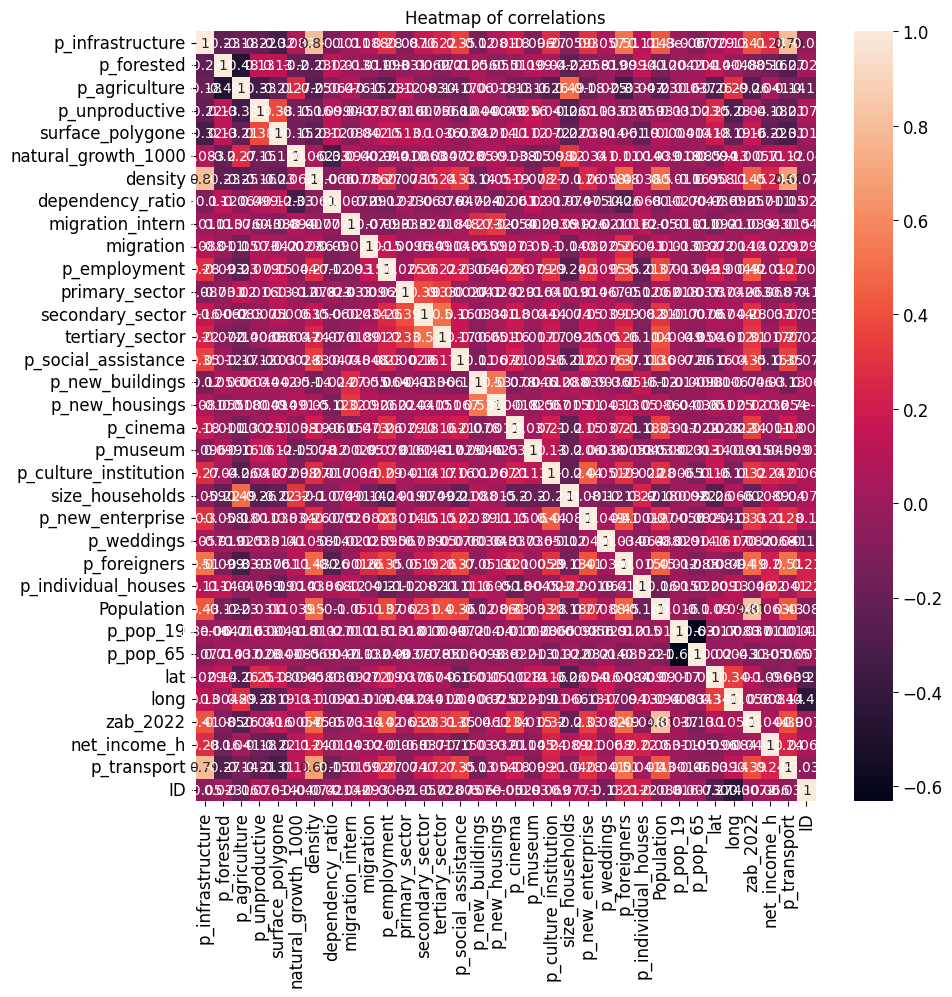

In [189]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = sn.heatmap(corr_matrix_2020, annot=True)
plt.title("Heatmap of correlations")
plt.rcParams["figure.figsize"] = (30,50)
plt.show()


Principal component Analysis => cf code in R

After the dimensionality reduction

In [190]:
df_2020.drop('secondary_sector', axis=1, inplace=True)
df_2020.drop('p_infrastructure', axis=1, inplace=True)
df_2020.drop('p_pop_65', axis=1, inplace=True)

##Number of clusters

delete the weights

In [191]:
df_2020.drop('Population', axis=1, inplace=True)
df_2020.drop('surface_polygone', axis=1, inplace=True)
df_2020.drop('ID', axis=1, inplace=True)

Silhouette score

set up to do a K-Means analysis

In [192]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Data preprocessing and standardization

In [193]:
from sklearn.preprocessing import StandardScaler
nostdf_2020 = df_2020

scaler = StandardScaler()
stdf_2020 = scaler.fit_transform(df_2020)

df_2020 = pd.DataFrame(stdf_2020)
print(df_2020)

            0         1         2         3         4         5         6   \
0    -0.236156  0.402897 -0.387710  0.752075  0.849433  0.211948 -0.235006   
1     0.788978 -1.801276 -0.273702 -0.256411  2.440470 -0.845849  0.672220   
2     1.517844 -1.485088 -0.067040  1.259047  0.603483 -0.556017  0.352253   
3    -0.108228 -0.414982 -0.437743  0.552419  2.072299 -0.843986 -0.351670   
4     0.065428 -0.229732 -0.246494  0.580577 -0.313516  0.369043  0.377764   
...        ...       ...       ...       ...       ...       ...       ...   
2140  0.821039  0.105788 -0.109904 -0.150250 -0.587528 -0.519803  1.018525   
2141 -0.741908  1.386283 -0.470105  0.262970 -0.446974 -0.319172 -0.516262   
2142  0.600214  0.188595 -0.263064 -0.709966 -0.469857 -0.895536 -0.745655   
2143 -0.187524  0.303895 -0.202646  0.669903  0.223297 -0.661887  1.716941   
2144 -0.903204  1.512063 -0.476315  1.910295 -0.570597 -0.506149 -0.603029   

            7         8         9   ...        18        19    

Determination of the parameters and the number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

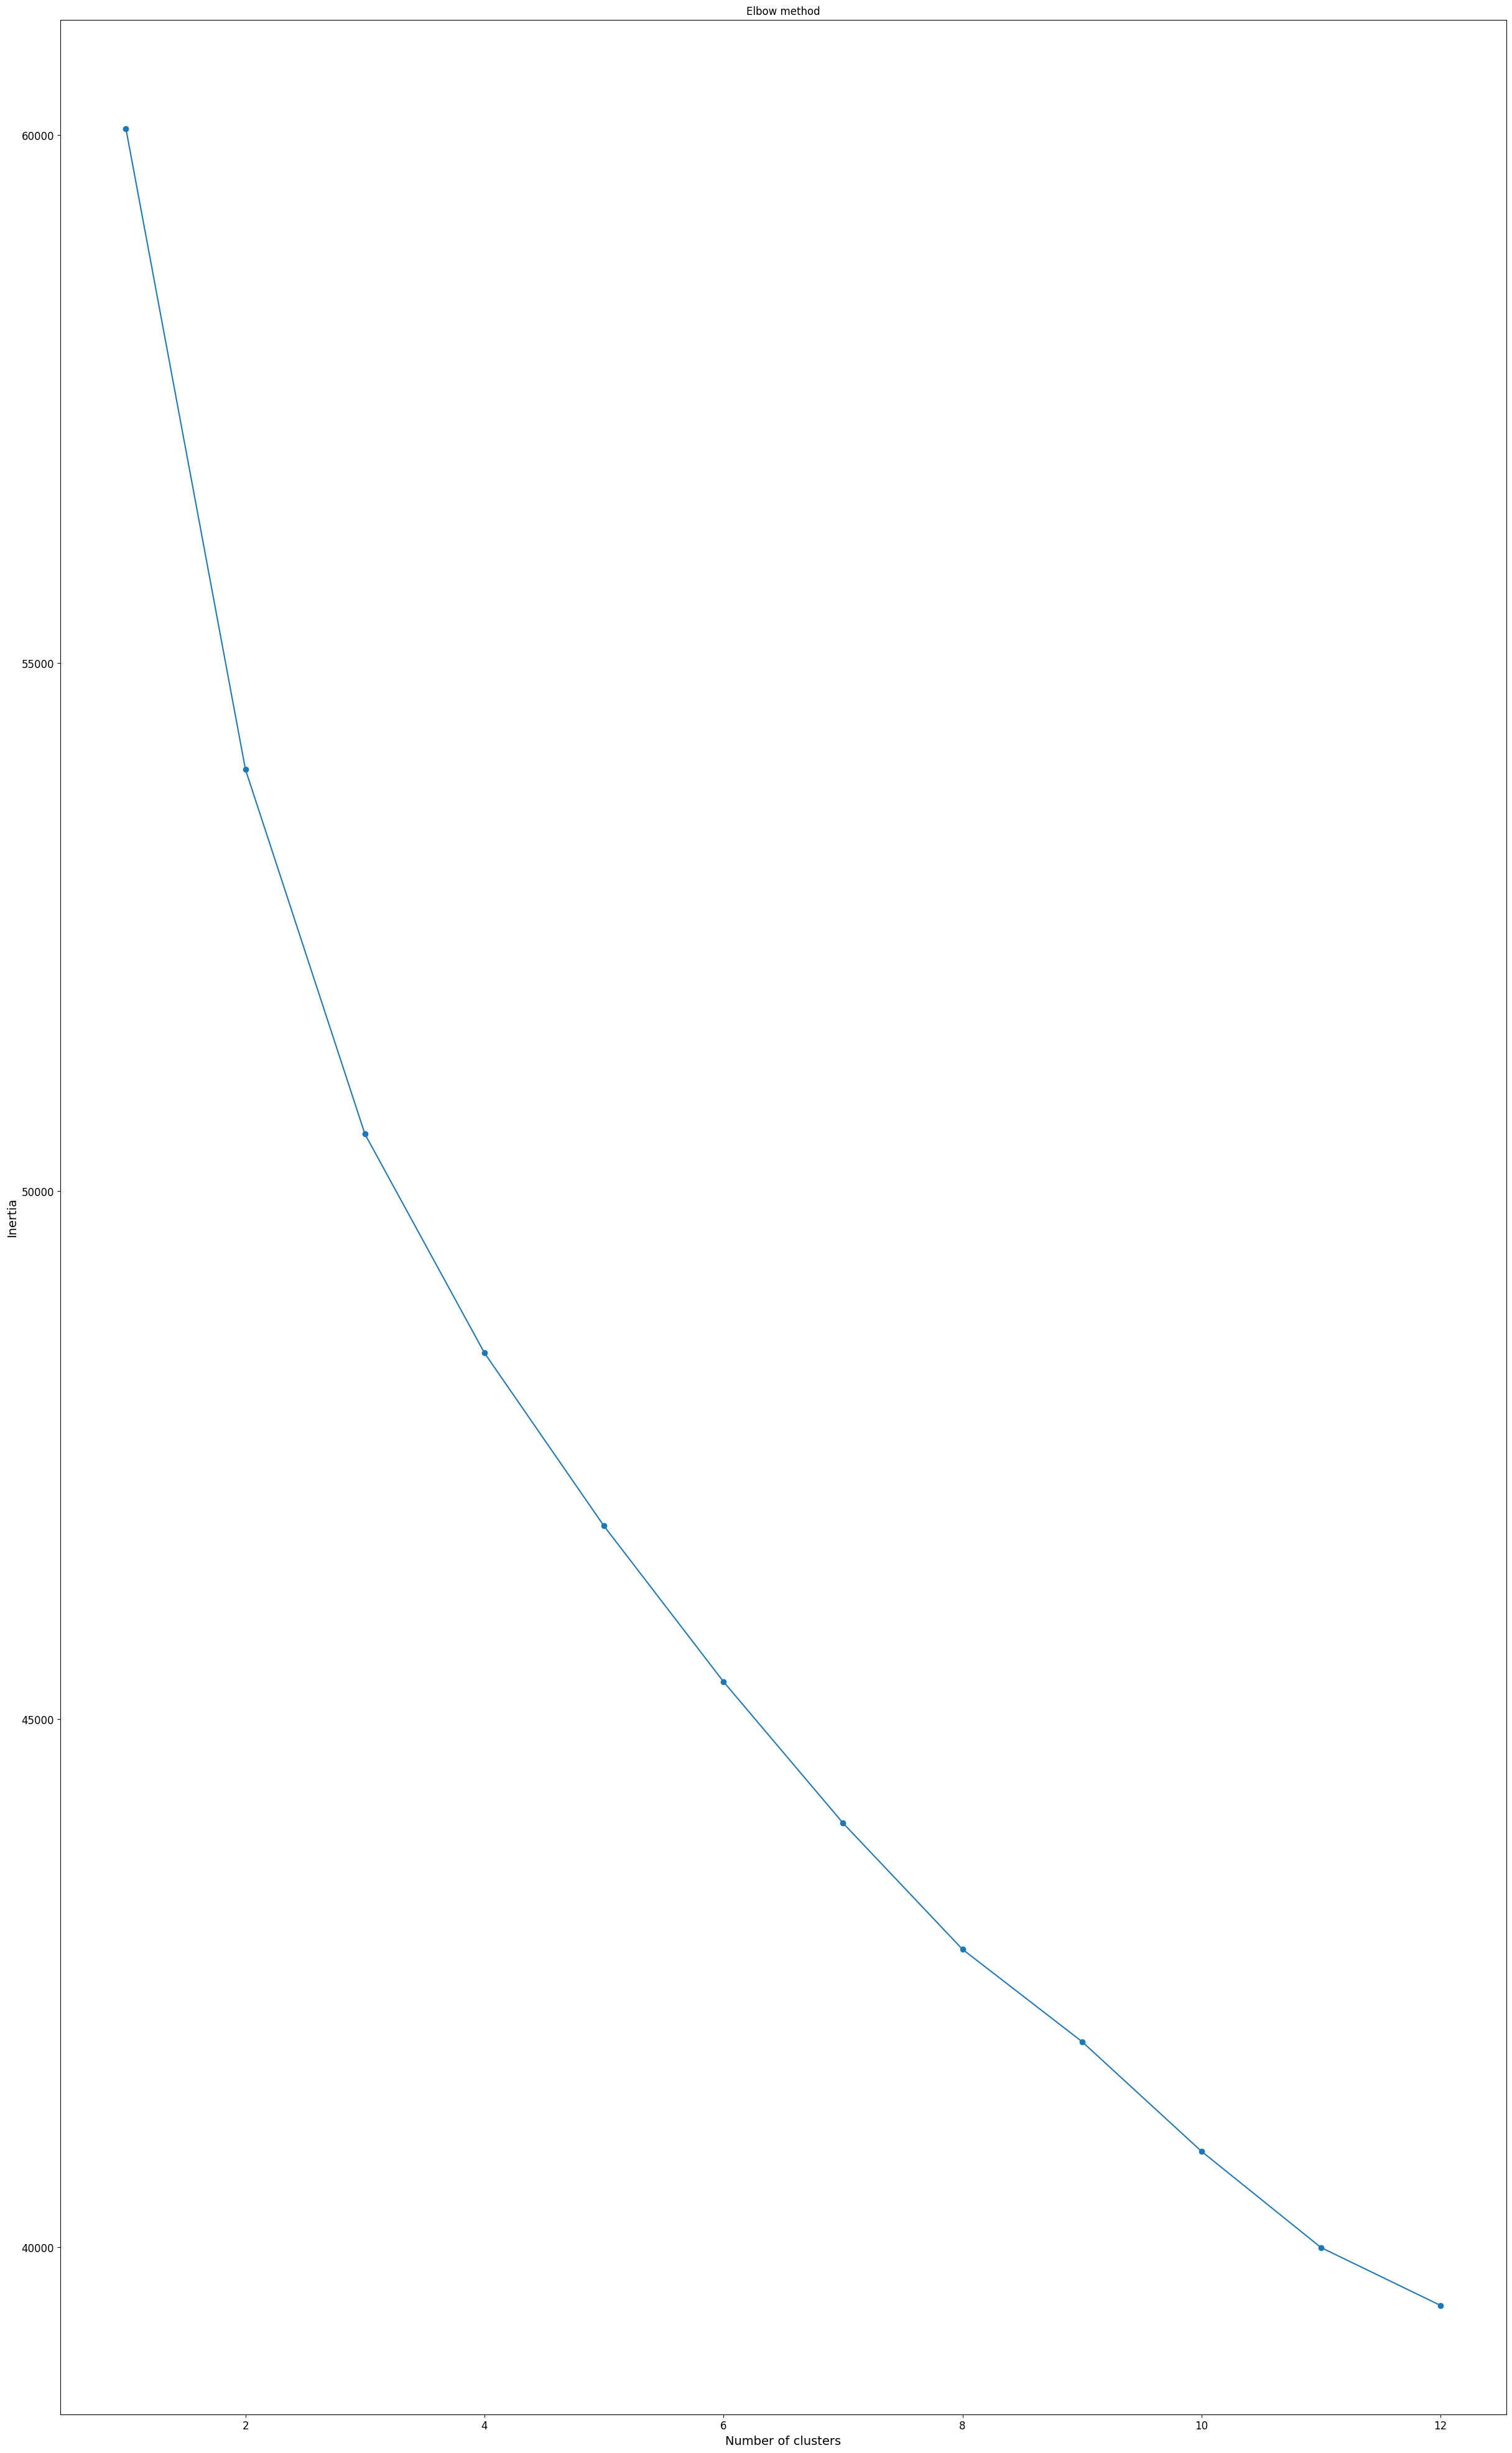

In [194]:
from sklearn.cluster import KMeans

df_2020 = np.nan_to_num(df_2020, nan=0)

inertias = []

for i in range(1,13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_2020)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,13), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [195]:
silhouette_ann= []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(num_clusters)
  kmeans.fit(df_2020)
  cluster_labels = kmeans.labels_
  
# silhouette score
  silhouette_ann.append(silhouette_score(df_2020, cluster_labels))
silhouette_ann

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.13413986544670317,
 0.11607196998324341,
 0.05927579578480929,
 0.0671890478453602,
 0.06151278350596934,
 0.059911290177767564,
 0.07040308528393019,
 0.06650526123830199]

In [196]:
num_clusters

9

In [197]:
Ncluster = range(1,num_clusters)
Ncluster
silhouette_ann

[0.13413986544670317,
 0.11607196998324341,
 0.05927579578480929,
 0.0671890478453602,
 0.06151278350596934,
 0.059911290177767564,
 0.07040308528393019,
 0.06650526123830199]

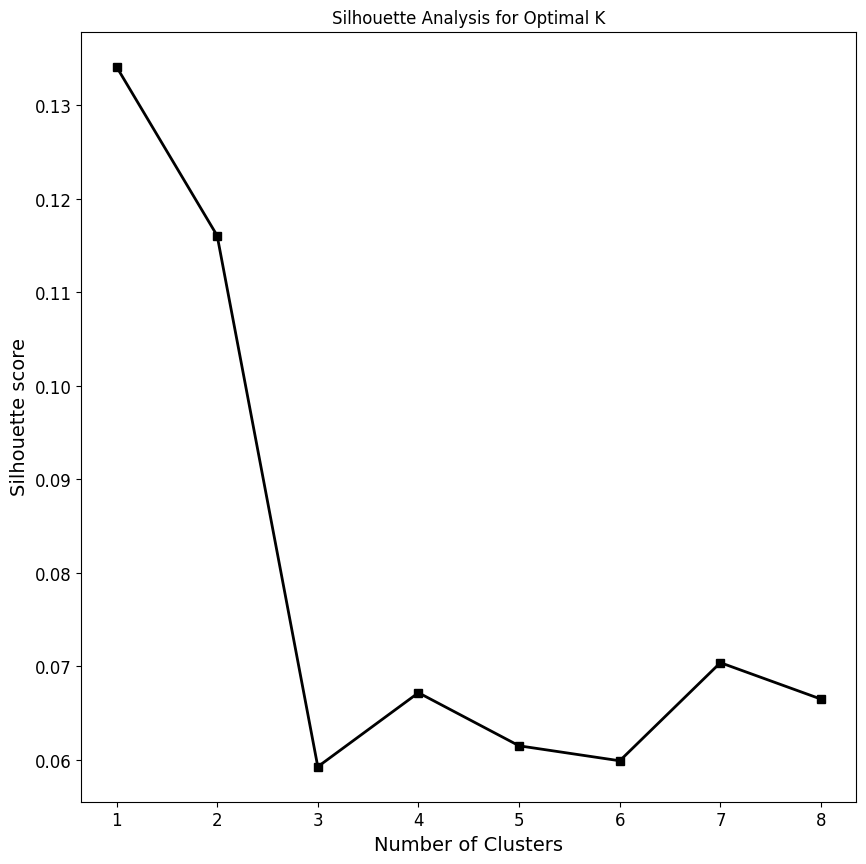

In [198]:
plt.plot(Ncluster,silhouette_ann,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal K')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [199]:
df_2020 = pd.DataFrame(df_2020)

In [200]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.236156,0.402897,-0.387710,0.752075,0.849433,0.211948,-0.235006,-0.450339,-0.860799,-0.456036,...,-0.047791,0.480363,0.044341,0.903133,0.473153,0.653389,0.766425,-0.040155,0.914539,0.354481
1,0.788978,-1.801276,-0.273702,-0.256411,2.440470,-0.845849,0.672220,0.630728,-0.142811,-0.456036,...,0.071155,0.480462,0.686635,0.154867,1.854858,0.843851,1.586786,0.160244,0.333935,2.248447
2,1.517844,-1.485088,-0.067040,1.259047,0.603483,-0.556017,0.352253,3.230494,-0.198906,-0.456036,...,-1.102330,0.131317,0.053892,0.848160,1.600923,0.827938,1.578933,-0.483187,1.557415,0.873228
3,-0.108228,-0.414982,-0.437743,0.552419,2.072299,-0.843986,-0.351670,0.495365,0.348830,-0.456036,...,0.353012,0.641806,0.898549,-0.120243,0.008241,0.827060,1.043581,1.290097,0.409594,1.569150
4,0.065428,-0.229732,-0.246494,0.580577,-0.313516,0.369043,0.377764,-1.213006,-0.373702,-0.456036,...,1.854728,0.032363,-0.629843,1.323720,0.462538,0.682132,1.375857,-0.493673,0.686775,0.416961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.821039,0.105788,-0.109904,-0.150250,-0.587528,-0.519803,1.018525,-0.463659,-0.810110,-0.456036,...,-1.102330,-0.874541,-1.053079,-0.795942,0.142566,-0.270769,-0.623588,-0.697054,-0.676859,-0.872931
2141,-0.741908,1.386283,-0.470105,0.262970,-0.446974,-0.319172,-0.516262,-0.149612,0.219391,-0.456036,...,-0.542185,0.210170,-0.748844,-1.709935,-1.944420,0.301317,0.232021,0.494755,-0.642972,-0.647275
2142,0.600214,0.188595,-0.263064,-0.709966,-0.469857,-0.895536,-0.745655,-0.922509,-0.531876,-0.456036,...,0.804815,1.534880,-0.967368,0.722918,0.008241,1.711248,1.098594,-0.655012,0.175373,-0.686957
2143,-0.187524,0.303895,-0.202646,0.669903,0.223297,-0.661887,1.716941,-1.785128,0.601906,-0.456036,...,-0.138033,-0.091370,0.053615,1.283603,0.008241,0.465163,0.904280,-0.107595,0.136163,-0.195689


Implement a weighted K-means


In [201]:
df_2020_K = df_2020

1. K-means without weight

In [202]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_2020)
print(kmeans)

y_kmean_3 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)


In [203]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.236156,0.402897,-0.387710,0.752075,0.849433,0.211948,-0.235006,-0.450339,-0.860799,-0.456036,...,-0.047791,0.480363,0.044341,0.903133,0.473153,0.653389,0.766425,-0.040155,0.914539,0.354481
1,0.788978,-1.801276,-0.273702,-0.256411,2.440470,-0.845849,0.672220,0.630728,-0.142811,-0.456036,...,0.071155,0.480462,0.686635,0.154867,1.854858,0.843851,1.586786,0.160244,0.333935,2.248447
2,1.517844,-1.485088,-0.067040,1.259047,0.603483,-0.556017,0.352253,3.230494,-0.198906,-0.456036,...,-1.102330,0.131317,0.053892,0.848160,1.600923,0.827938,1.578933,-0.483187,1.557415,0.873228
3,-0.108228,-0.414982,-0.437743,0.552419,2.072299,-0.843986,-0.351670,0.495365,0.348830,-0.456036,...,0.353012,0.641806,0.898549,-0.120243,0.008241,0.827060,1.043581,1.290097,0.409594,1.569150
4,0.065428,-0.229732,-0.246494,0.580577,-0.313516,0.369043,0.377764,-1.213006,-0.373702,-0.456036,...,1.854728,0.032363,-0.629843,1.323720,0.462538,0.682132,1.375857,-0.493673,0.686775,0.416961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.821039,0.105788,-0.109904,-0.150250,-0.587528,-0.519803,1.018525,-0.463659,-0.810110,-0.456036,...,-1.102330,-0.874541,-1.053079,-0.795942,0.142566,-0.270769,-0.623588,-0.697054,-0.676859,-0.872931
2141,-0.741908,1.386283,-0.470105,0.262970,-0.446974,-0.319172,-0.516262,-0.149612,0.219391,-0.456036,...,-0.542185,0.210170,-0.748844,-1.709935,-1.944420,0.301317,0.232021,0.494755,-0.642972,-0.647275
2142,0.600214,0.188595,-0.263064,-0.709966,-0.469857,-0.895536,-0.745655,-0.922509,-0.531876,-0.456036,...,0.804815,1.534880,-0.967368,0.722918,0.008241,1.711248,1.098594,-0.655012,0.175373,-0.686957
2143,-0.187524,0.303895,-0.202646,0.669903,0.223297,-0.661887,1.716941,-1.785128,0.601906,-0.456036,...,-0.138033,-0.091370,0.053615,1.283603,0.008241,0.465163,0.904280,-0.107595,0.136163,-0.195689


In [204]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_2020)
y_kmean_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2. K-Means avec weighted pop

In [205]:
kmeans = KMeans(n_clusters=3)
weights = w_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_pop_3 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [206]:
kmeans = KMeans(n_clusters=7)
weights = w_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_pop_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3. K-Means with weight on the surface

In [207]:
kmeans = KMeans(n_clusters=3)
weights = w_surf
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
print(kmeans)
y_kmean_surf_3 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)


In [208]:
kmeans = KMeans(n_clusters=7)
weights = w_surf
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_surf_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [209]:
df_2020['cluster_3']= y_kmean_3
df_2020['cluster_7']= y_kmean_7
df_2020['cluster_pop_3']= y_kmean_pop_3
df_2020['cluster_pop_7']= y_kmean_pop_7
df_2020['cluster_surf_3']= y_kmean_surf_3
df_2020['cluster_surf_7']= y_kmean_surf_7

In [210]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,cluster_3,cluster_7,cluster_pop_3,cluster_pop_7,cluster_surf_3,cluster_surf_7
0,-0.236156,0.402897,-0.387710,0.752075,0.849433,0.211948,-0.235006,-0.450339,-0.860799,-0.456036,...,0.766425,-0.040155,0.914539,0.354481,0,1,1,1,0,1
1,0.788978,-1.801276,-0.273702,-0.256411,2.440470,-0.845849,0.672220,0.630728,-0.142811,-0.456036,...,1.586786,0.160244,0.333935,2.248447,1,4,2,2,1,3
2,1.517844,-1.485088,-0.067040,1.259047,0.603483,-0.556017,0.352253,3.230494,-0.198906,-0.456036,...,1.578933,-0.483187,1.557415,0.873228,0,1,1,1,0,1
3,-0.108228,-0.414982,-0.437743,0.552419,2.072299,-0.843986,-0.351670,0.495365,0.348830,-0.456036,...,1.043581,1.290097,0.409594,1.569150,1,6,2,5,1,6
4,0.065428,-0.229732,-0.246494,0.580577,-0.313516,0.369043,0.377764,-1.213006,-0.373702,-0.456036,...,1.375857,-0.493673,0.686775,0.416961,0,1,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.821039,0.105788,-0.109904,-0.150250,-0.587528,-0.519803,1.018525,-0.463659,-0.810110,-0.456036,...,-0.623588,-0.697054,-0.676859,-0.872931,0,3,1,0,0,1
2141,-0.741908,1.386283,-0.470105,0.262970,-0.446974,-0.319172,-0.516262,-0.149612,0.219391,-0.456036,...,0.232021,0.494755,-0.642972,-0.647275,0,1,1,1,0,1
2142,0.600214,0.188595,-0.263064,-0.709966,-0.469857,-0.895536,-0.745655,-0.922509,-0.531876,-0.456036,...,1.098594,-0.655012,0.175373,-0.686957,0,1,1,1,0,1
2143,-0.187524,0.303895,-0.202646,0.669903,0.223297,-0.661887,1.716941,-1.785128,0.601906,-0.456036,...,0.904280,-0.107595,0.136163,-0.195689,0,1,1,1,0,4


3. Kmeans en fonction du PCA

1. importer les valeurs 


In [211]:
url = 'https://github.com/axellebersier/Urban_data_mining/blob/main/Data/PCA_data_2020.xlsx?raw=true'
df_2020_pca = pd.read_excel(url)

In [212]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stdf_2020_pca = scaler.fit_transform(df_2020_pca)

df_2020_pca = pd.DataFrame(data=stdf_2020_pca, columns=df_2020_pca.columns)

In [213]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=7)
kmeans_pca.fit(df_2020_pca) 
y_kmean_pca = kmeans_pca.predict(df_2020_pca)

weights = w_pop
kmeans_pca = KMeans(n_clusters=7)
kmeans_pca.fit(df_2020_pca) 
y_kmean_pca_pop = kmeans_pca.predict(df_2020_pca,sample_weight = w_pop)

weights = w_surf
kmeans_pca = KMeans(n_clusters=7)
kmeans_pca.fit(df_2020_pca) 
y_kmean_pca_surf = kmeans_pca.predict(df_2020_pca,sample_weight = w_surf)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [214]:
df_2020['pca_cluster']= y_kmean_pca
df_2020['pca_surf']= y_kmean_pca_surf
df_2020['pca_pop']= y_kmean_pca_pop
df_2020

,0,1,2,3,4,5,6,7,8,9,...,27,cluster_3,cluster_7,cluster_pop_3,cluster_pop_7,cluster_surf_3,cluster_surf_7,pca_cluster,pca_surf,pca_pop
0,-0.236156,0.402897,-0.387710,0.752075,0.849433,0.211948,-0.235006,-0.450339,-0.860799,-0.456036,...,0.354481,0,1,1,1,0,1,1,2,4
1,0.788978,-1.801276,-0.273702,-0.256411,2.440470,-0.845849,0.672220,0.630728,-0.142811,-0.456036,...,2.248447,1,4,2,2,1,3,1,2,4
2,1.517844,-1.485088,-0.067040,1.259047,0.603483,-0.556017,0.352253,3.230494,-0.198906,-0.456036,...,0.873228,0,1,1,1,0,1,1,2,4
3,-0.108228,-0.414982,-0.437743,0.552419,2.072299,-0.843986,-0.351670,0.495365,0.348830,-0.456036,...,1.569150,1,6,2,5,1,6,1,2,4
4,0.065428,-0.229732,-0.246494,0.580577,-0.313516,0.369043,0.377764,-1.213006,-0.373702,-0.456036,...,0.416961,0,1,1,1,0,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.821039,0.105788,-0.109904,-0.150250,-0.587528,-0.519803,1.018525,-0.463659,-0.810110,-0.456036,...,-0.872931,0,3,1,0,0,1,3,3,6
2141,-0.741908,1.386283,-0.470105,0.262970,-0.446974,-0.319172,-0.516262,-0.149612,0.219391,-0.456036,...,-0.647275,0,1,1,1,0,1,3,3,6
2142,0.600214,0.188595,-0.263064,-0.709966,-0.469857,-0.895536,-0.745655,-0.922509,-0.531876,-0.456036,...,-0.686957,0,1,1,1,0,1,4,1,1
2143,-0.187524,0.303895,-0.202646,0.669903,0.223297,-0.661887,1.716941,-1.785128,0.601906,-0.456036,...,-0.195689,0,1,1,1,0,4,4,1,1


In [215]:
df_2020['ID'] = df_ID
df_2020.to_csv('data_kmeansweighted.csv', index = False, sep=',')


In [216]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,cluster_3,cluster_7,cluster_pop_3,cluster_pop_7,cluster_surf_3,cluster_surf_7,pca_cluster,pca_surf,pca_pop,ID
0,-0.236156,0.402897,-0.387710,0.752075,0.849433,0.211948,-0.235006,-0.450339,-0.860799,-0.456036,...,0,1,1,1,0,1,1,2,4,3
1,0.788978,-1.801276,-0.273702,-0.256411,2.440470,-0.845849,0.672220,0.630728,-0.142811,-0.456036,...,1,4,2,2,1,3,1,2,4,27
2,1.517844,-1.485088,-0.067040,1.259047,0.603483,-0.556017,0.352253,3.230494,-0.198906,-0.456036,...,0,1,1,1,0,1,1,2,4,29
3,-0.108228,-0.414982,-0.437743,0.552419,2.072299,-0.843986,-0.351670,0.495365,0.348830,-0.456036,...,1,6,2,5,1,6,1,2,4,52
4,0.065428,-0.229732,-0.246494,0.580577,-0.313516,0.369043,0.377764,-1.213006,-0.373702,-0.456036,...,0,1,1,1,0,4,1,2,4,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.821039,0.105788,-0.109904,-0.150250,-0.587528,-0.519803,1.018525,-0.463659,-0.810110,-0.456036,...,0,3,1,0,0,1,3,3,6,767
2141,-0.741908,1.386283,-0.470105,0.262970,-0.446974,-0.319172,-0.516262,-0.149612,0.219391,-0.456036,...,0,1,1,1,0,1,3,3,6,1098
2142,0.600214,0.188595,-0.263064,-0.709966,-0.469857,-0.895536,-0.745655,-0.922509,-0.531876,-0.456036,...,0,1,1,1,0,1,4,1,1,3219
2143,-0.187524,0.303895,-0.202646,0.669903,0.223297,-0.661887,1.716941,-1.785128,0.601906,-0.456036,...,0,1,1,1,0,4,4,1,1,4072
